# AWGN-Kanal und digitale Modulationsverfahren

## Transinformation

Bei der Übertragung über einen AWGN-Kanal wird das Informationssignal $x$ durch weißes, gaußverteiltes Rauschen $n$ überlagert, es gilt $y=x+n$. Die Transinformation erhält man gemäß Definition aus der Differenz der differentiellen Entropien

\begin{align}
    I({\cal X};{\cal Y}) &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) \; .
\end{align}

Der Term $h({\cal Y} \mid {\cal X})$ entspricht der differentiellen Entropie $h({\cal N})$ des Rauschens und ist bei gegebener Rauschleistung konstant. Für digitale Modulationsverfahren mit diskreten Alphabeten wie ASK, QAM und PSK gibt es keine einfachen analytischen Ausdrücke für die Transinformation. Der Grund dafür ist, dass die für die Berechnung von $h({\cal Y})$ benötigte Wahrscheinlichkeitsdichte

\begin{align}
    p(y) = \sum_{x \in \mathbb{X}} p(y \mid x) \cdot \Pr \{ x\}
\end{align}

aus einer Summe von Termen besteht, die das Argument des Logarithmus bilden und sich nicht mehr vereinfachen lassen. Die Transinformation

\begin{align}
    I({\cal X};{\cal Y}) 
    = \sum_{x \in \mathbb{X}} \Pr\{ x \} \cdot 
      \int_{-\infty}^{\infty} p(y \mid x) \cdot \log_2 \frac{p(y \mid x)}{p(y)} \ dy
\end{align}

lässt sich daher nur numerisch berechnen. Die Einheit der Transinformation ist bit/s/Hz, also eine auf die Bandbreite normierte Datenrate. Man spricht daher auch von spektraler Effizienz.

## Phase Shift Keying (PSK)

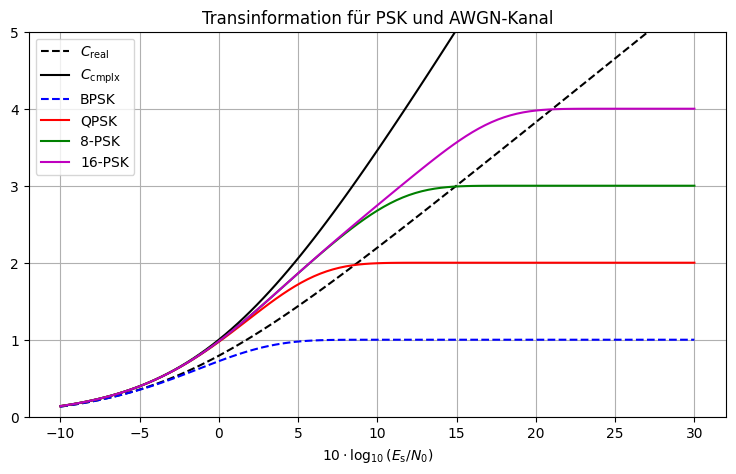

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation
from EXIT.info_theory import mi_awgn

SNRdB = np.linspace(-10,30,101)
SNR = 10**(SNRdB/10)

Cgauss_real = 0.5 * np.log2(1+2*SNR)
Cgauss_cmplx = np.log2(1+SNR)

PSK2  = Modulation(1, coding_type='gray',modulation_type='PSK')
PSK4  = Modulation(2, coding_type='gray',modulation_type='PSK')
PSK8  = Modulation(3, coding_type='gray',modulation_type='PSK')
PSK16 = Modulation(4, coding_type='gray',modulation_type='PSK')

I_PSK2  = mi_awgn(PSK2.constellationNorm,np.ones(2)/2,SNRdB,100)
I_PSK4  = mi_awgn(PSK4.constellationNorm,np.ones(4)/4,SNRdB,100)
I_PSK8  = mi_awgn(PSK8.constellationNorm,np.ones(8)/8,SNRdB,100)
I_PSK16 = mi_awgn(PSK16.constellationNorm,np.ones(16)/16,SNRdB,100)

fig1 = plt.figure(figsize=(9,5))
ax1 = fig1.add_subplot(111)
ax1.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax1.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax1.plot(SNRdB, I_PSK2, 'b--', label='BPSK')
ax1.plot(SNRdB, I_PSK4, 'r-', label='QPSK')
ax1.plot(SNRdB, I_PSK8, 'g-', label='8-PSK')
ax1.plot(SNRdB, I_PSK16, 'm-', label='16-PSK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für PSK und AWGN-Kanal')
plt.grid()

Im obigen Bild ist zu beachten, dass das SNR logarithmisch aufgetragen ist. Die schwarzen Kurven (gestrichelt für den reellen Fall) stellen die Kapazitäten des AWGN-Kanals für gaußverteilte Eingangssignale und somit obere Schranken für die digitalen Modulationsverfahren dar. Für großes SNR gehen die PSK-Kurven in die Sättigung, da sie nicht mehr Information als die Anzahl der Bit je Symbol übertragen können. Für BPSK beträgt die maximale Transinformation 1 bit/Symbol, für QPSK 2 bit/Symbol, für 8-PSK 3 bit/Symbol usw. Für sehr kleine Signal-Rausch-Abstände liegen die Kurven nahezu übereinander. Hier ist die Verwendung eines hochstufigen Modulationsverfahrens nicht sinnvoll, eine BPSK ist völlig ausreichend.

Trägt man die Kurven über das Energieeffizienzmaß $E_{\mathrm{b}}/N_0$ auf, erhalten wir das untere Diagramm. Der absolute Grenzwert von -1.59 dB gilt auch für die digitalen Modulationsverfahren. Im reellen Fall liegt er 3 dB höher, also bei 1.41 dB.

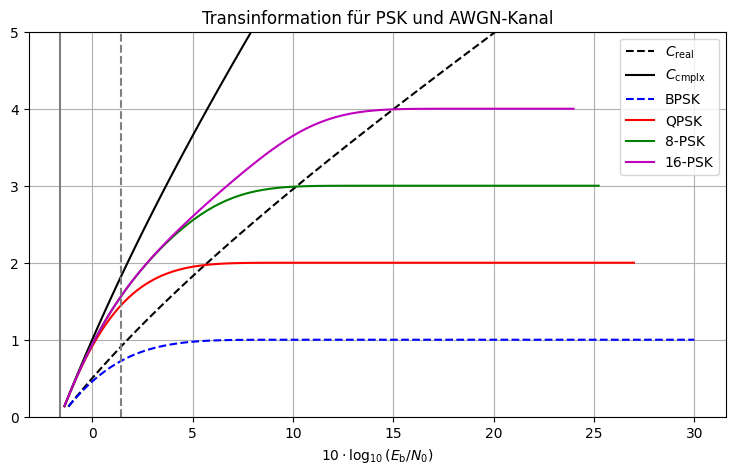

In [12]:
EbN0dB_gauss_real = SNRdB - 20*np.log10(Cgauss_real)
EbN0dB_gauss_cmplx = SNRdB - 10*np.log10(Cgauss_cmplx)

EbN0dB_PSK2 = SNRdB - 10*np.log10(I_PSK2)
EbN0dB_PSK4 = SNRdB - 10*np.log10(I_PSK4)
EbN0dB_PSK8 = SNRdB - 10*np.log10(I_PSK8)
EbN0dB_PSK16 = SNRdB - 10*np.log10(I_PSK16)

fig2 = plt.figure(figsize=(9,5))
ax2 = fig2.add_subplot(111)
ax2.plot(EbN0dB_gauss_real, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax2.plot(EbN0dB_gauss_cmplx, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax2.plot(EbN0dB_PSK2, I_PSK2, 'b--', label='BPSK')
ax2.plot(EbN0dB_PSK4, I_PSK4, 'r-', label='QPSK')
ax2.plot(EbN0dB_PSK8, I_PSK8, 'g-', label='8-PSK')
ax2.plot(EbN0dB_PSK16, I_PSK16, 'm-', label='16-PSK')
ax2.plot([-1.59,-1.59], [0,5], '-', color='gray')
ax2.plot([1.41,1.41], [0,5], '--', color='grey')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{b}}/N_0)$')
plt.title('Transinformation für PSK und AWGN-Kanal')
plt.grid()

## Amplitude Shift Keying

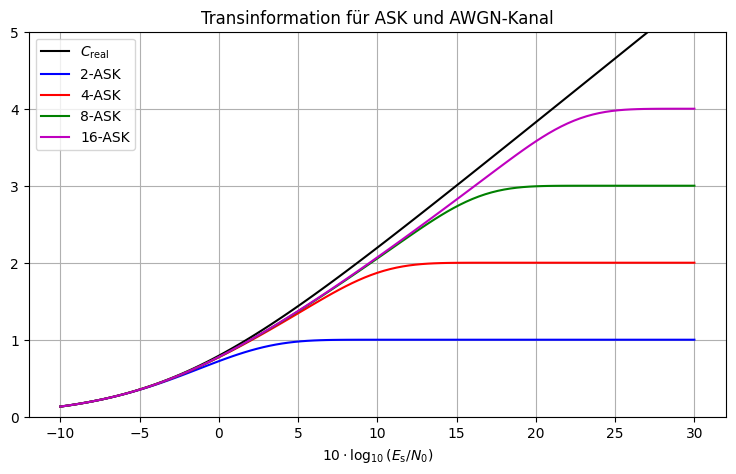

In [13]:
ASK4  = Modulation(2, coding_type='gray',modulation_type='ASK')
ASK8  = Modulation(3, coding_type='gray',modulation_type='ASK')
ASK16 = Modulation(4, coding_type='gray',modulation_type='ASK')


I_ASK2  = I_PSK2
I_ASK4  = mi_awgn(ASK4.constellationNorm,np.ones(4)/4,SNRdB,100)
I_ASK8  = mi_awgn(ASK8.constellationNorm,np.ones(8)/8,SNRdB,100)
I_ASK16 = mi_awgn(ASK16.constellationNorm,np.ones(16)/16,SNRdB,100)

fig3 = plt.figure(figsize=(9,5))
ax3 = fig3.add_subplot(111)
ax3.plot(SNRdB, Cgauss_real, 'k-', label='$C_{\mathrm{real}}$')
ax3.plot(SNRdB, I_ASK2, 'b-', label='2-ASK')
ax3.plot(SNRdB, I_ASK4, 'r-', label='4-ASK')
ax3.plot(SNRdB, I_ASK8, 'g-', label='8-ASK')
ax3.plot(SNRdB, I_ASK16, 'm-', label='16-ASK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für ASK und AWGN-Kanal')
plt.grid()

## Quadrature Amplitude Modulation (QAM)

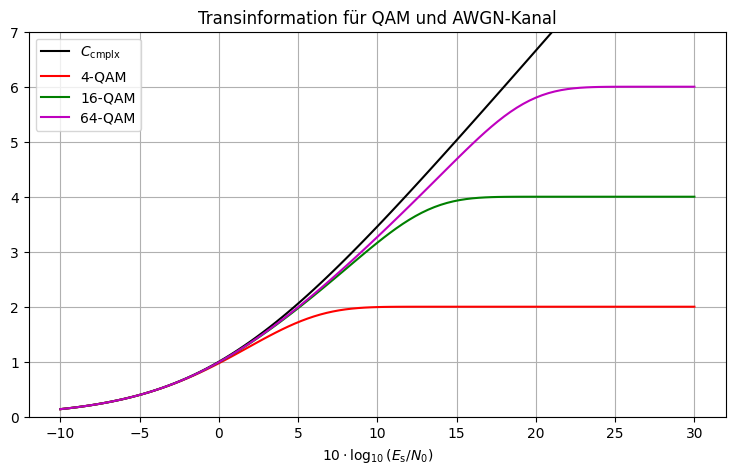

In [15]:
# create alphabets
QAM4  = Modulation(2, coding_type='gray',modulation_type='QAM')
QAM16 = Modulation(4, coding_type='gray',modulation_type='QAM')
QAM64 = Modulation(6, coding_type='gray',modulation_type='QAM')

I_QAM4  = mi_awgn(QAM4.constellationNorm,np.ones(4)/4,SNRdB,100)
I_QAM16 = mi_awgn(QAM16.constellationNorm,np.ones(16)/16,SNRdB,100)
I_QAM64 = mi_awgn(QAM64.constellationNorm,np.ones(64)/64,SNRdB,100)

fig4 = plt.figure(figsize=(9,5))
ax4 = fig4.add_subplot(111)
ax4.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax4.plot(SNRdB, I_QAM4, 'r-', label='4-QAM')
ax4.plot(SNRdB, I_QAM16, 'g-', label='16-QAM')
ax4.plot(SNRdB, I_QAM64, 'm-', label='64-QAM')
plt.ylim(0,7)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für QAM und AWGN-Kanal')
plt.grid()

## Vergleich der Modulationsverfahren

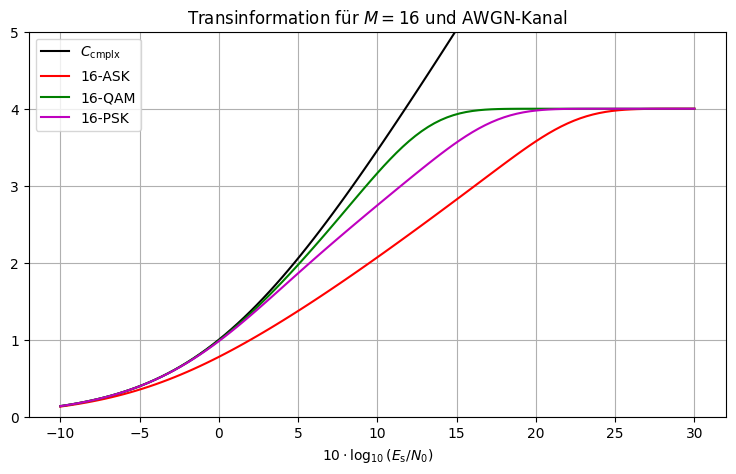

In [16]:
fig5 = plt.figure(figsize=(9,5))
ax5 = fig5.add_subplot(111)
ax5.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax5.plot(SNRdB, I_ASK16, 'r-', label='16-ASK')
ax5.plot(SNRdB, I_QAM16, 'g-', label='16-QAM')
ax5.plot(SNRdB, I_PSK16, 'm-', label='16-PSK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für $M=16$ und AWGN-Kanal')
plt.grid()

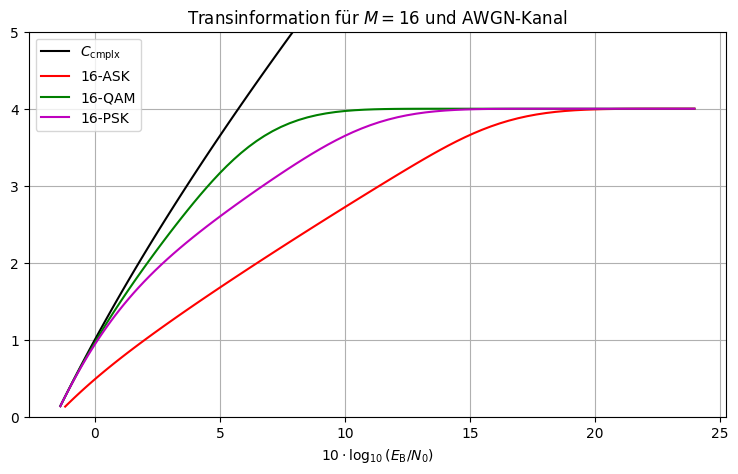

In [19]:
EbN0dB_ASK16 = SNRdB - 10*np.log10(I_ASK16)
EbN0dB_QAM16 = SNRdB - 10*np.log10(I_QAM16)
EbN0dB_PSK16 = SNRdB - 10*np.log10(I_PSK16)

fig6 = plt.figure(figsize=(9,5))
ax6 = fig6.add_subplot(111)
ax6.plot(EbN0dB_gauss_cmplx, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax6.plot(EbN0dB_ASK16, I_ASK16, 'r-', label='16-ASK')
ax6.plot(EbN0dB_QAM16, I_QAM16, 'g-', label='16-QAM')
ax6.plot(EbN0dB_PSK16, I_PSK16, 'm-', label='16-PSK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{B}}/N_0)$')
plt.title('Transinformation für $M=16$ und AWGN-Kanal')
plt.grid()

Im den obigen Bildern wird deutlich, dass die QAM die bei gleicher Stufigkeit die höchste Transinformation erzielt. Dies liegt an der effizienteren Ausnutzung der komplexen Ebene, durch die bei gleicher Symbolanzahl und mittlerer Sendeleistung eine größere euklidische Distanz zwischen den Symbolen erzielt werden kann. Bei der ASK wird der Imaginärteil nicht genutzt, die Anordnung ist eindimensional. Bei der PSK liegen die Symbole auf einem Kreis und nutzen die komplexe Ebene ebenfalls nicht effizient aus.

## Shaping des Sendealphabets

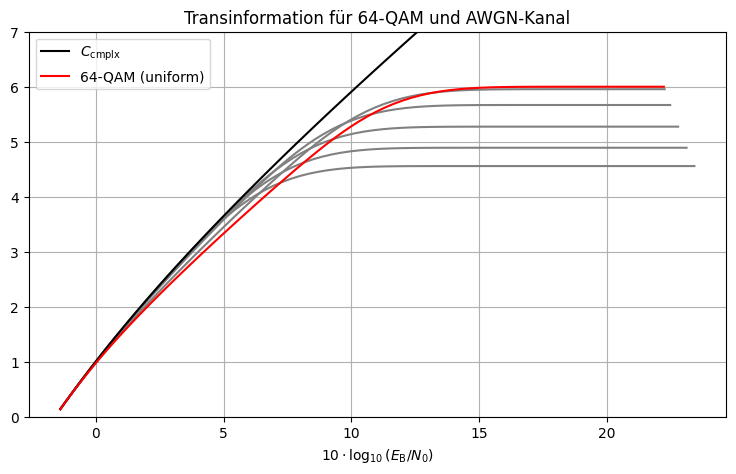

In [26]:
# approximate gaussian distribution of QAM alphabet
M = 64
alpha = np.arange(0.01,0.1,0.02)
pmf_gauss = np.zeros((M,len(alpha)))
I_QAM64_gauss = np.zeros((len(SNRdB),len(alpha)))
EbN0dB_QAM64_gauss = np.zeros((len(SNRdB),len(alpha)))

for run in np.arange(len(alpha)):
    pmf_gauss[:,run] = np.exp(-alpha[run]*np.abs(QAM64.constellation)**2)
    pmf_gauss[:,run] = pmf_gauss[:,run] / np.sum(pmf_gauss[:,run])
    I_QAM64_gauss[:,run] = mi_awgn(QAM64.constellationNorm,pmf_gauss[:,run],SNRdB,100)
    EbN0dB_QAM64_gauss[:,run] = SNRdB - 10*np.log10(I_QAM64_gauss[:,run])

EbN0dB_QAM64 = SNRdB - 10*np.log10(I_QAM64)

fig7 = plt.figure(figsize=(9,5))
ax7 = fig7.add_subplot(111)
for run in np.arange(len(alpha)):
    ax7.plot(EbN0dB_QAM64_gauss[:,run], I_QAM64_gauss[:,run],color='gray')
ax7.plot(EbN0dB_gauss_cmplx, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax7.plot(EbN0dB_QAM64, I_QAM64, 'r-', label='64-QAM (uniform)')
plt.ylim(0,7)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{B}}/N_0)$')
plt.title('Transinformation für 64-QAM und AWGN-Kanal')
plt.grid()

Dem obigen Diagramm ist zu entnehmen, dass bei einer näherungsweisen Gaußverteilung der QAM-Symbole die Transinformation erhöht werden kann. Die Gleichverteilung der QAM-Symbole ist für hohe Signal-Rausch-Abstände die beste Verteilung, da bei einer Gleichverteilung die größte Entropie $H_{\max} = \log_2(M)=6$ bit erreicht wird. Das Shaping (graue Kurven) verringert also die asymptotisch erreichbare Transinformation. Im mittleren SNR-Bereich kann Shaping aber eine höhere Transinformation als die Gleichverteilung erzielen und die Lücke zur Kanalkapazität schließen. Aus den sich schneidenden grauen Kurven kann geschlossen werden, dass die optimale Varianz der approximativen Gaußverteilung vom Signal-Rausch-Abstand abhängt. Die Kanalkapazität für einen analogen exakt gaußverteilten Eingang stellt nach wie vor die obere Schranke dar. 